<a href="https://colab.research.google.com/github/SangamSilwal/Machine-learning-Series/blob/main/Voting_Classifier_Day_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np

In [17]:
from sklearn.datasets import load_iris

In [28]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = iris.target

In [30]:
df.head(2)

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Species
0                5.1               3.5  ...               0.2        0
1                4.9               3.0  ...               0.2        0

[2 rows x 5 columns]

In [31]:
import seaborn as sns

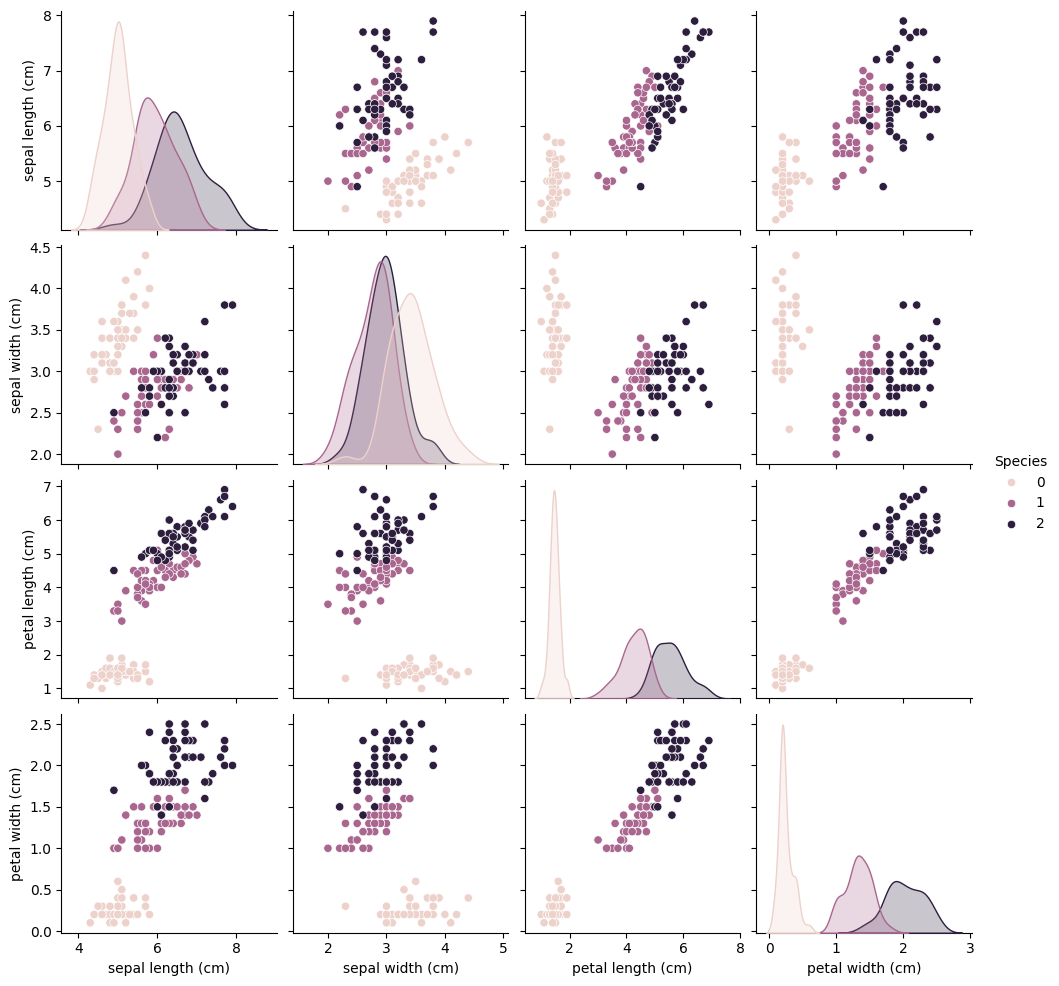

In [32]:
sns.pairplot(df,hue="Species")

In [33]:
new_df = df[df['Species'] !=0][['sepal length (cm)','sepal width (cm)','Species']]

In [34]:
new_df.head()

sepal length (cm)  sepal width (cm)  Species
50                7.0               3.2        1
51                6.4               3.2        1
52                6.9               3.1        1
53                5.5               2.3        1
54                6.5               2.8        1

In [42]:
X = new_df.iloc[:,0:2]
y = new_df.iloc[:,2]

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [44]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [45]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [46]:
for estimator in estimators:
  x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy',error_score='raise')
  print(estimator[0],np.round(np.mean(x),2))

lr 0.75
rf 0.6
knn 0.61


In [47]:
from sklearn.ensemble import VotingClassifier

# HardVoting

In [48]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.68


# Soft Voting

In [49]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.65


# Weights

In [50]:
vc2 = VotingClassifier(estimators=estimators,voting='soft',weights=[3,1,1])
x = cross_val_score(vc2,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.71


# Classifier of same ALGO

In [51]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=2)

svm1 = SVC(probability=True,kernel='poly',degree=1)
svm2 = SVC(probability=True,kernel='poly',degree=2)
svm3 = SVC(probability=True,kernel='poly',degree=3)
svm4 = SVC(probability=True,kernel='poly',degree=4)
svm5 = SVC(probability=True,kernel='poly',degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
  x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy',error_score='raise')
  print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [52]:
vc3 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc3,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
